In [1]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import * 
import numpy as np 
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.data_process import *
%load_ext autoreload
%autoreload 2
%matplotlib inline
#plt.rcParams['figure.figsize'] = [10, 6]
#plt.rcParams['figure.dpi'] = 200
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'
X_test_dsample_dir = './data/X_test_downsample.npy'
y_test_dsample_dir = './data/y_test_downsample.npy' 
X_train_valid_dsample_dir = './data/X_train_valid_downsample.npy' 
y_train_valid_dsample_dir = './data/y_train_valid_downsample.npy'
X_test_ds = np.load(X_test_dsample_dir)
y_test_ds = np.load(y_test_dsample_dir)
X_train_valid_ds = np.load(X_train_valid_dsample_dir)
y_train_valid_ds = np.load(y_train_valid_dsample_dir)

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


(1000,)
(500,)


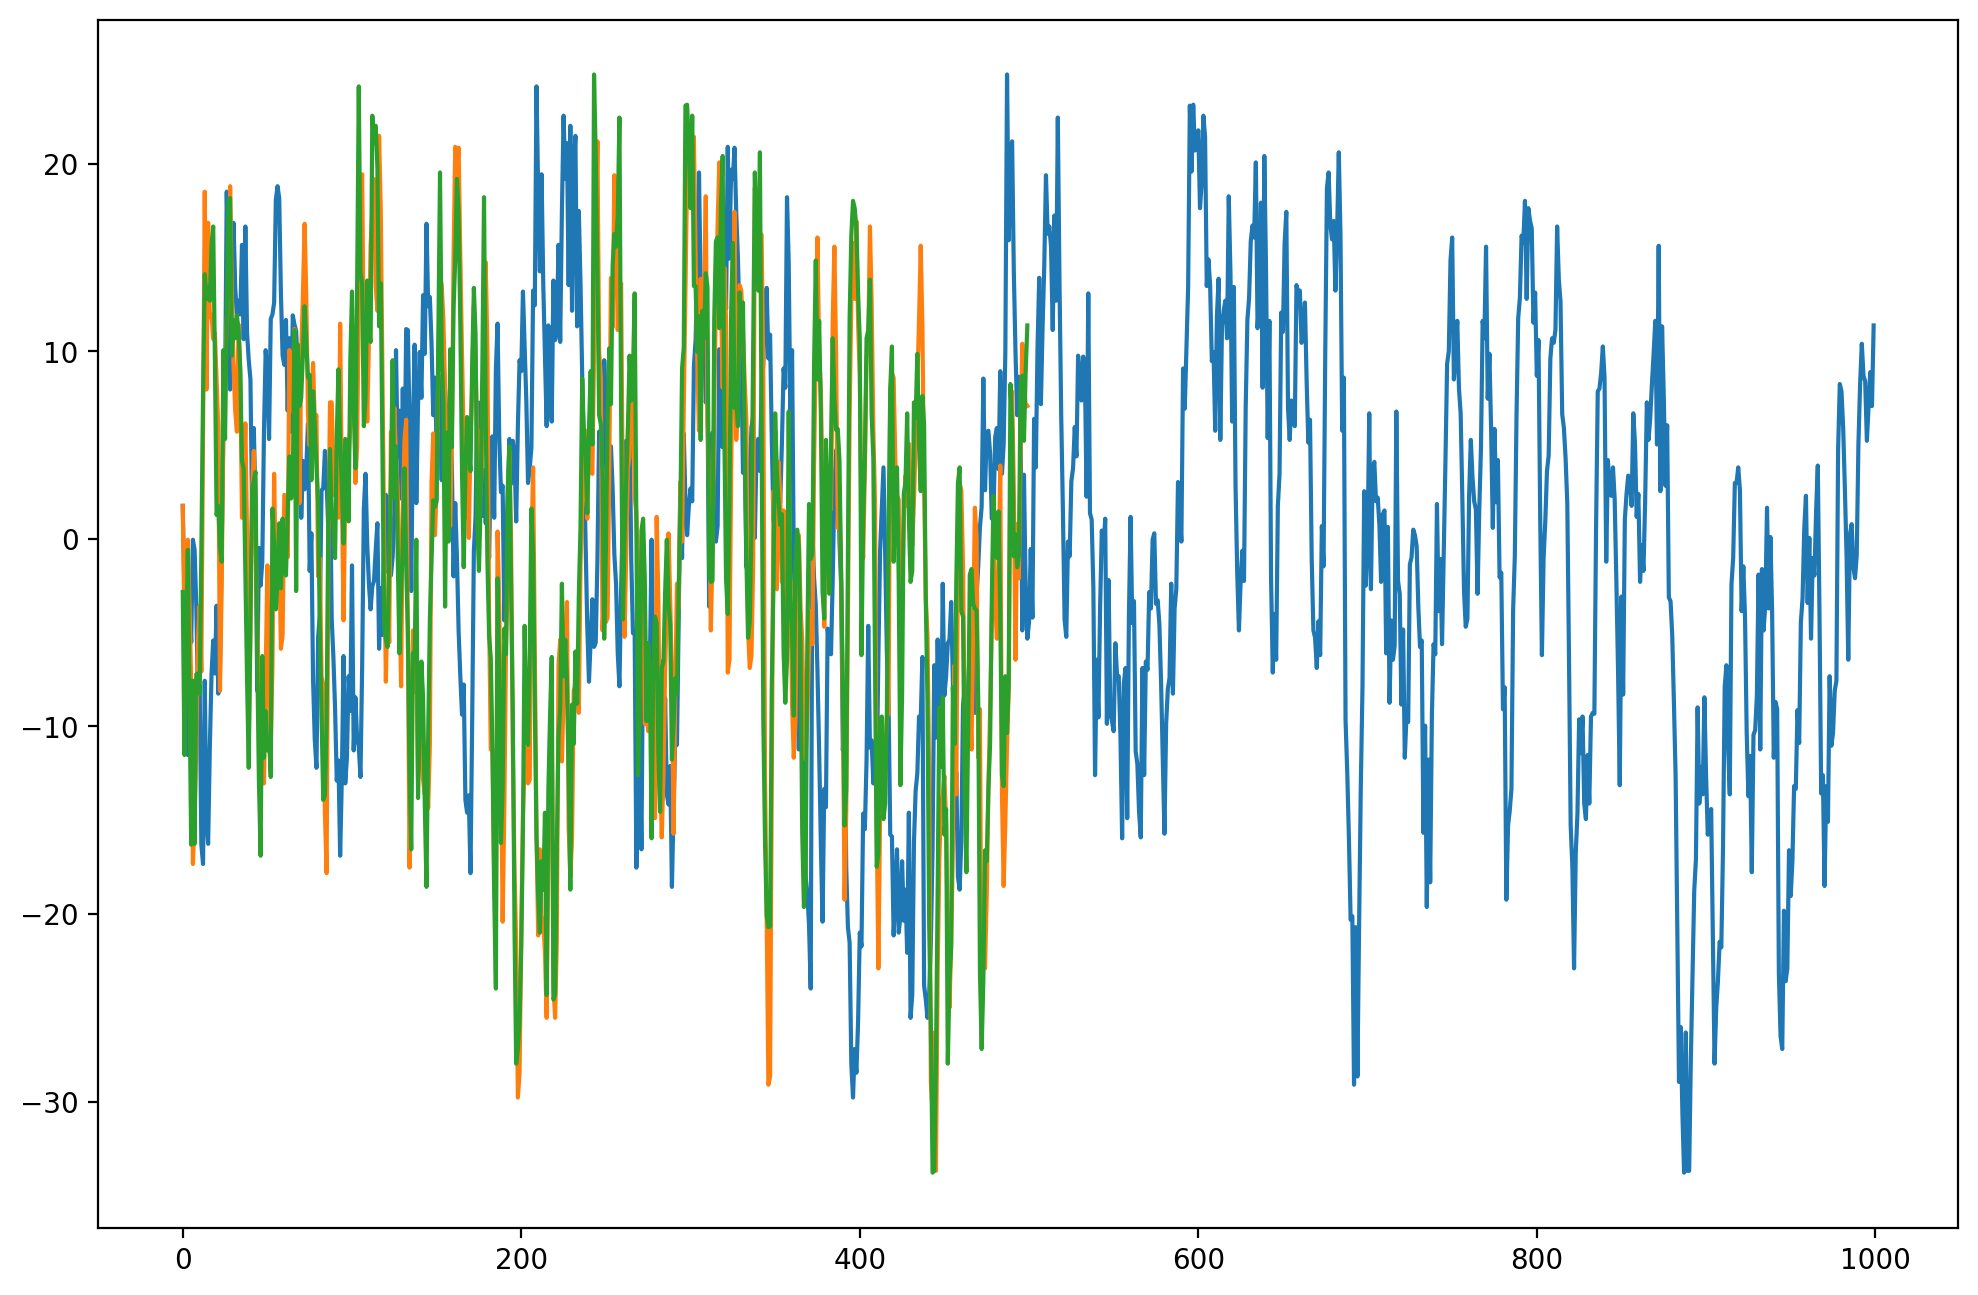

In [4]:
#downsample(X_train_valid)
sig = X_train_valid[75,9]
print(sig.shape)
d1,d2 = split_data(sig)
plt.plot(sig)
plt.plot(d1)
plt.plot(d2)


(1000,)


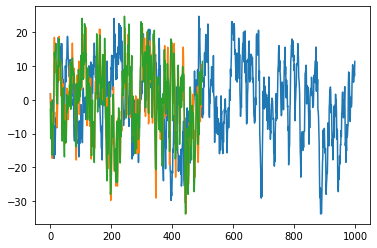

In [2]:
sig = X_train_valid[75,9]
print(sig.shape)
d1,d2 = split_data(sig)
plt.plot(sig)
plt.plot(d1)
plt.plot(d2)


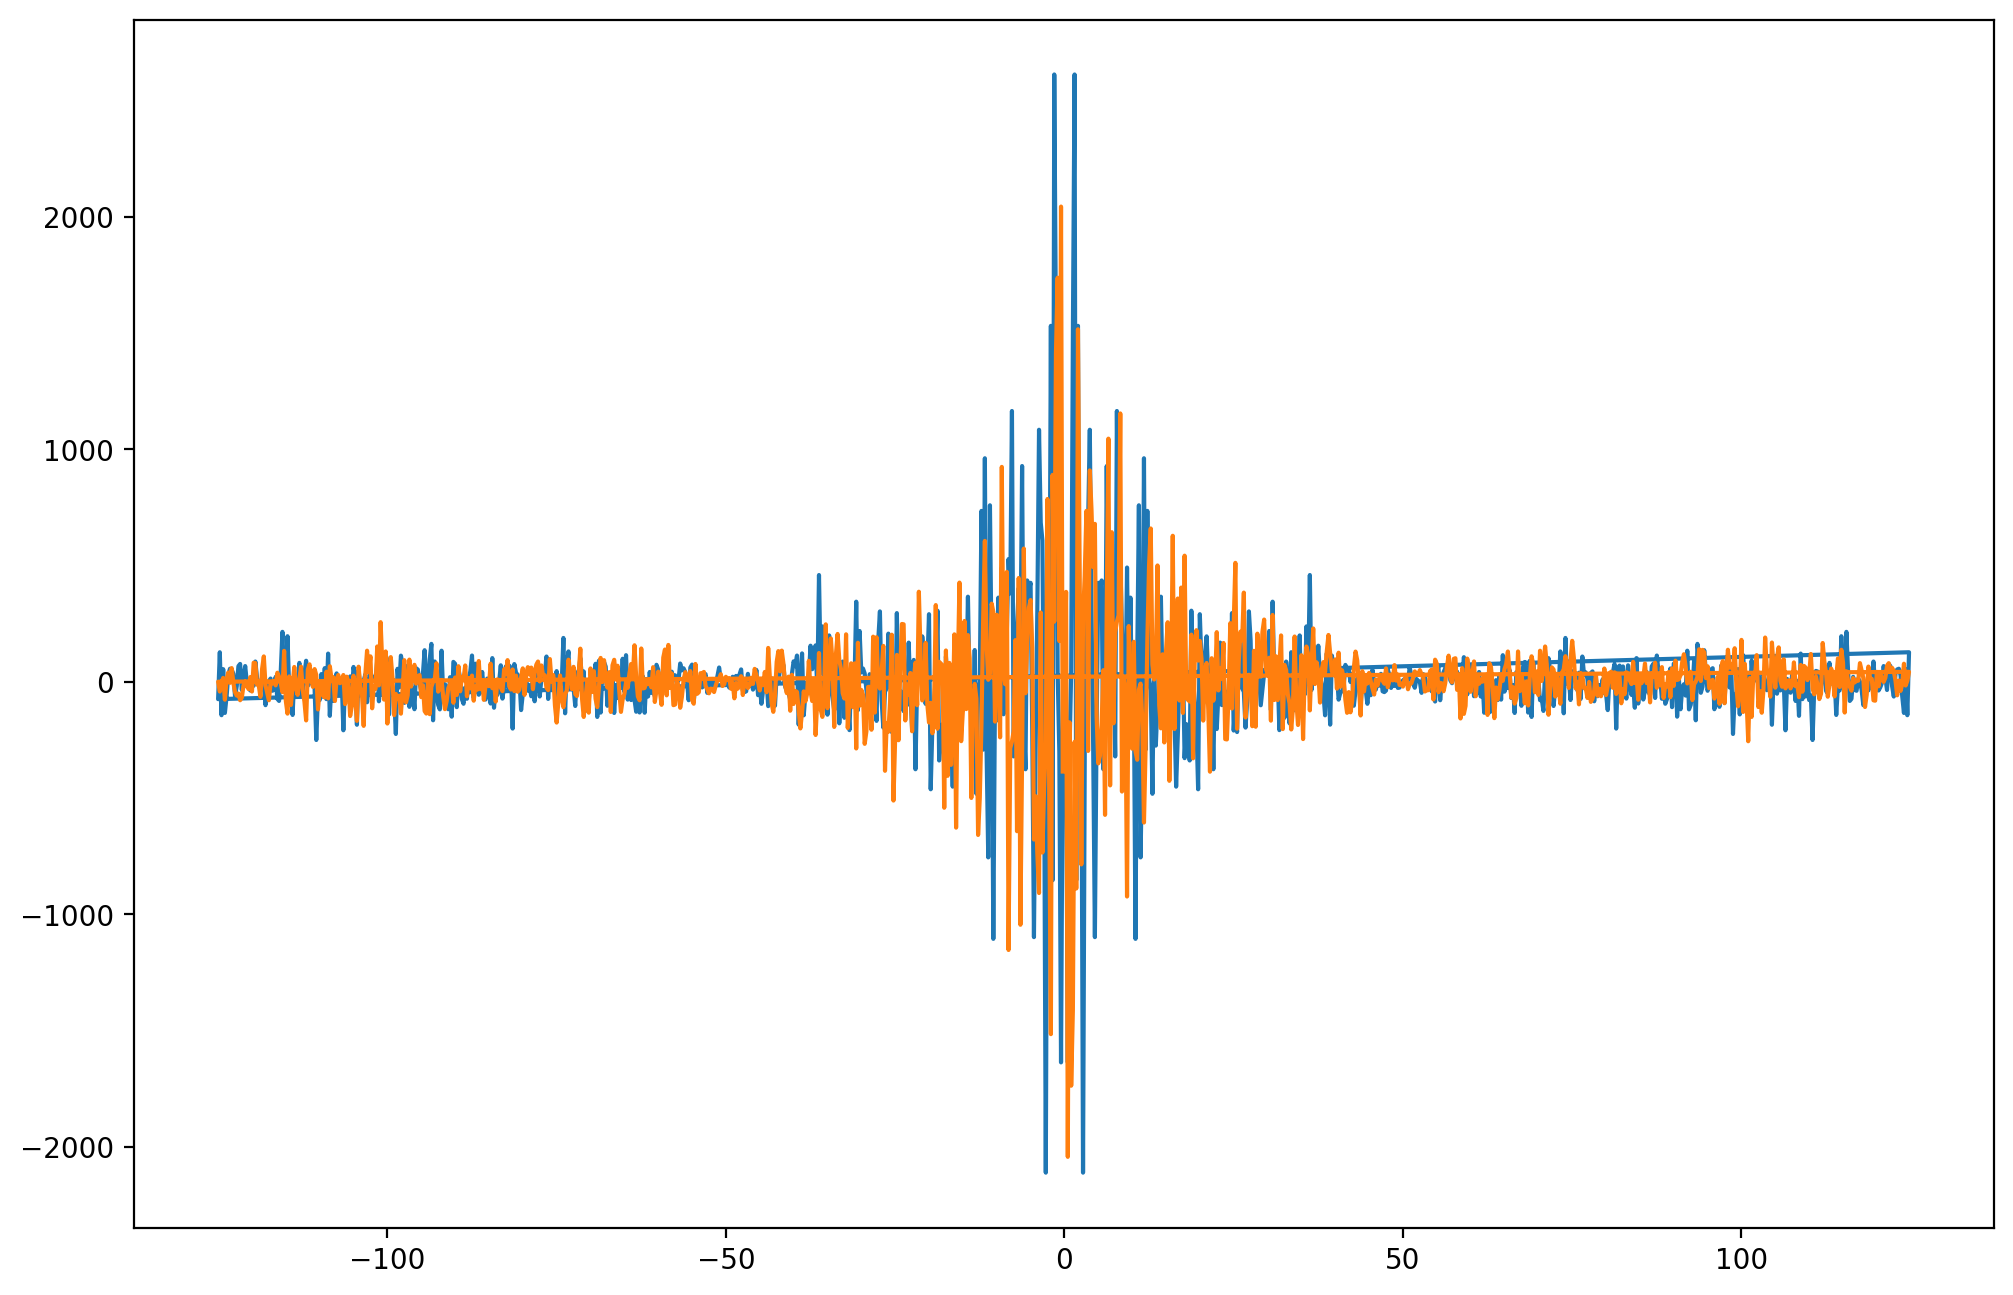

In [55]:

sig = X_train_valid[75,5]
#plot = plt.plot(sig)
sp = np.fft.fft(sig)
freq = np.fft.fftfreq(1000)*250


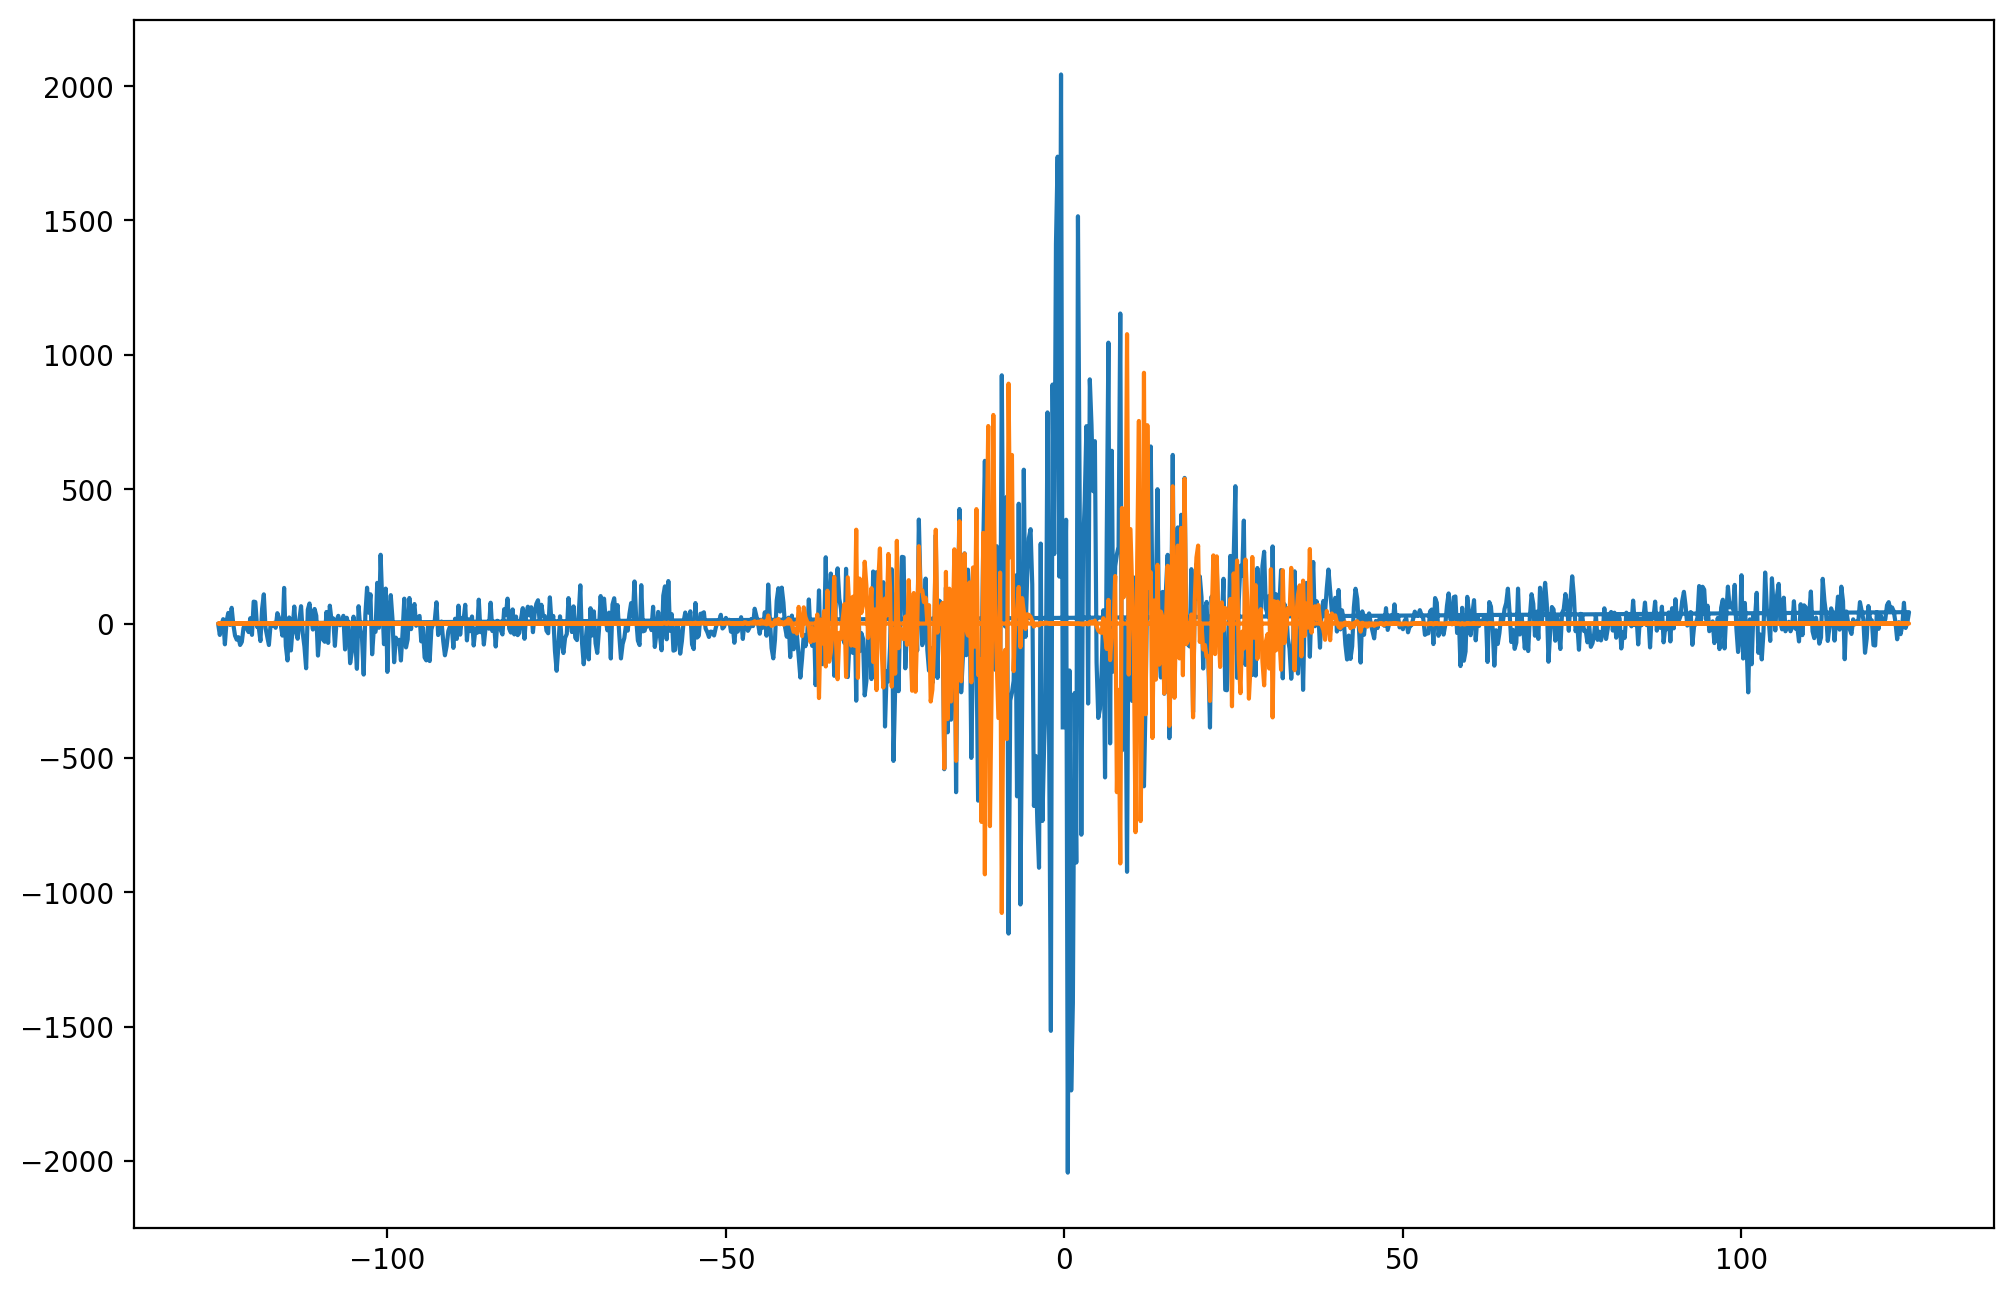

In [72]:

def butter_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 250 
lowcut = 8
hightcut = 35 
sig_band = butter_bandpass_filter(sig,lowcut,hightcut,fs)
sp_band = np.fft.fft(sig_band)
freq = np.fft.fftfreq(1000)*250
#plt.plot(freq,sp.real)
plt.plot(freq,sp.imag)
#a = plt.plot(freq,sp_band.real)
b = plt.plot(freq,sp_band.imag)




(1000,)


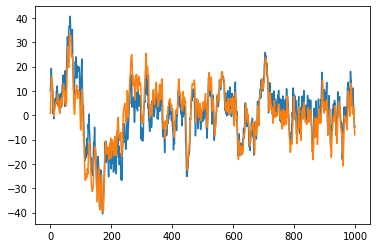

In [74]:
sig = X_train_valid[1,1,:]
plt.plot(sig)
sig_band = butter_bandpass_filter(sig,lowcut=0.1,highcut=70,fs=250)
print(sig_band.shape)
plt.plot(sig_band)

In [57]:
print(X_train_valid.shape)
band_pass_data(X_train_valid,
    data_filename='./data/band_pass_data/X_train_val_0.1_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)



(2115, 22, 1000)


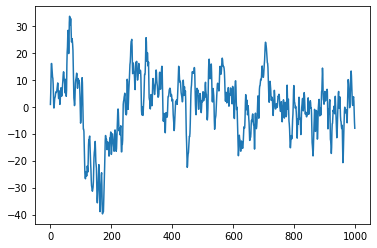

In [73]:
X_train_val_band = np.load('./data/band_pass_data/X_train_val_0.1_70.npy')
plt.plot(X_train_val_band[1,1,:])

(4230, 22, 500)


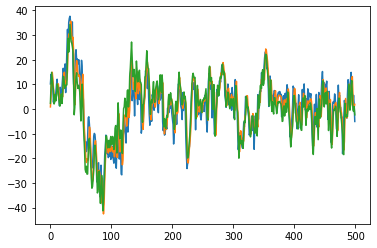

In [85]:
print(X_train_valid_ds.shape)
sig = X_train_valid_ds[2,1,:]
plt.plot(sig)
sig_band = butter_bandpass_filter(sig,lowcut=0.1,highcut=70,fs=250)

plt.plot(sig_band)
plt.plot(sig_band2)


In [89]:
print(X_train_valid.shape)
band_pass_data(X_train_valid,
    data_filename='./data/band_pass_data/X_train_val_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_train_valid,
    data_filename='./data/band_pass_data/X_train_val_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)
band_pass_data(X_train_valid_ds,
    data_filename='./data/band_pass_data/X_train_val_downsample_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_train_valid_ds,
    data_filename='./data/band_pass_data/X_train_val_downsample_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)

(2115, 22, 1000)


In [90]:

band_pass_data(X_test_ds,
    data_filename='./data/band_pass_data/X_test_downsample_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_test_ds,
    data_filename='./data/band_pass_data/X_test_downsample_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)
band_pass_data(X_test,
    data_filename='./data/band_pass_data/X_test_05_70.npy',
    low_cut=0.5,
    high_cut=70,
    fs=250)
band_pass_data(X_test,
    data_filename='./data/band_pass_data/X_test_01_70.npy',
    low_cut=0.1,
    high_cut=70,
    fs=250)
